In [140]:
from clustimage import Clustimage
import pandas as pd
import glob

In [141]:
# This cell is tagged as "parameters" to allow use by papermill

# FILE_LIST_GLOB = '/home/aubrey/Desktop/libcamera/tinian_cycads_cropped/40/0*a.png'
# FILE_LIST_GLOB = '/home/aubrey/Desktop/tinian_sticky_trap_images/*/[0-9][0-9][0-9].png'
CATALOG_PATH = '/home/aubrey/Desktop/tinian_sticky_trap_images/catalog.csv'
SIZE_CLASS = '4 to 5 mm'

In [142]:
pd.set_option('max_colwidth', 0)
df = pd.read_csv(CATALOG_PATH)
imagelist = df['path'][df['size_class']==SIZE_CLASS].tolist()

In [143]:
# mylist = glob.glob(FILE_LIST_GLOB)

In [144]:
cl = Clustimage()
results = cl.fit_transform(imagelist, min_clust=1, max_clust=30)

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 3/3 [00:00<00:00, 912.73it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [49152] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [49152] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..


[clustimage] >INFO> Extracted features using [pca]: samples=3, features=2
[clustimage] >INFO> Compute embedding using [tsne]
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 28/28 [00:00<00:00, 3778.41it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (3, 2) feature-space.


[clusteval] >No clusters detected.
[clusteval] >Optimal number clusters detected: [1].
[clusteval] >Fin.


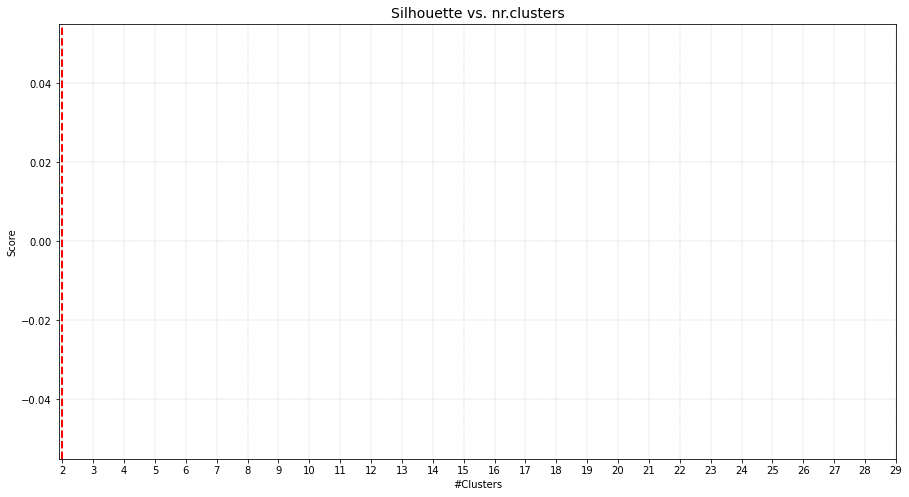

[clusteval] >Error: No valid labels provided.


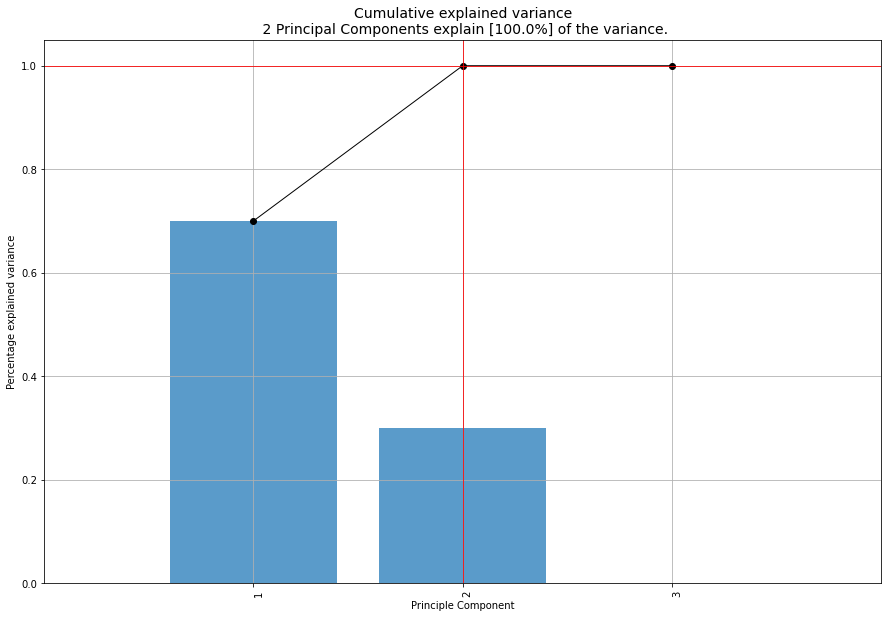

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 2 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [145]:
# Cluster evaluation
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])
cl.pca.plot()

In [146]:
# Dendrogram
# cl.dendrogram(figsize=(30,10))

In [147]:
# Plot unique image per cluster
# cl.plot_unique(img_mean=False, show_hog=True)

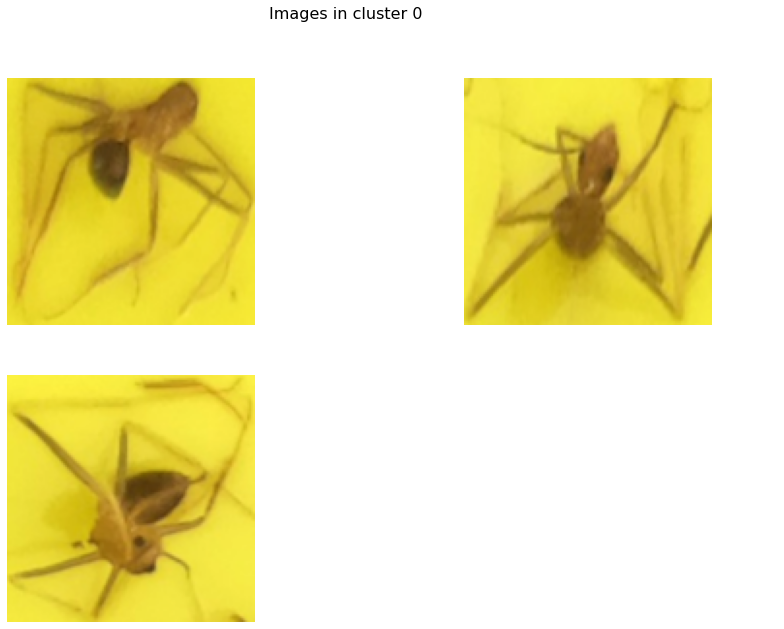

In [148]:
cl.plot()

In [149]:
# Update catalog: add cluster number

pathnames = list(results['pathnames'])
labels = list(results['labels'])
paths_and_labels = list(zip(pathnames, labels))

for path_and_label in paths_and_labels:
    path, label = path_and_label
    print(path, label)
    df.loc[df['path'] == path, 'cluster'] = label

df.to_csv(CATALOG_PATH, index=False)

/home/aubrey/Desktop/tinian_sticky_trap_images/2/127.png 0
/home/aubrey/Desktop/tinian_sticky_trap_images/2/038.png 0
/home/aubrey/Desktop/tinian_sticky_trap_images/2/053.png 0
